### シグモイド関数

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

def sigmoid(z):
    e = math.e
    
    g = 1 / (1 + np.exp(-z))
    
    return g

z = np.arange(-10, 10, 0.5)

g = sigmoid(z)

plt.plot(z, g)
plt.show()

<Figure size 640x480 with 1 Axes>

# 【問題1】ロジスティック回帰のクラスを作成する
- ロジスティック回帰で使用する数式を意識すべきところは理解を深めるために愚直にかく  
 from IPython.core.debugger import Pdb; Pdb().set_trace()

In [2]:
#import sys                                                         # ライブラリまでのディレクトリ定義
#sys.path.append('../ml-scratch/utils')
#import const　　　　                                                 # 定数に代入すると怒るやつ
import numpy as np

class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """
    
    # ネイピア数を定数定義(クラス内定数定義を試してみたかった .pyにしたら使うかも)
    # const.E = math.e
    
    def __init__(self, num_iter=3000, lr=0.1, c=0.1, no_bias=False, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.c = c
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        self.coef_ = np.array([])
        

    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

          Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        
        # 次元数を必要に応じて追加
        if X.ndim < 2:
            X = X[:, np.newaxis]
        if y.ndim < 2:
            y = y[:, np.newaxis]
        
        # X_val,y_valが定義されている時
        if X_val is not None and y_val is not None:
            # 次元数を必要に応じて追加
            if X_val.ndim < 2:
                X_val = X_val[:, np.newaxis]
            if y_val.ndim < 2:
                y_val = y_val[:, np.newaxis]
            # バイアス入れないフラグが立っていない場合は、バイアス項を1で先頭列に挿入
            if self.no_bias is False:
                X_val = np.hstack((np.ones(len(X_val))[:, np.newaxis], X_val))
        
        # バイアス入れないフラグが立っていない場合は、バイアス項を1で先頭列に挿入
        if self.no_bias is False:
            X = np.hstack((np.ones(len(X))[:, np.newaxis], X))

        # パラメータを列数に応じて乱数で初期化
        self.coef_ =  np.random.rand(X.shape[1])[:, np.newaxis]
        
        for i in range(self.iter):
             # 仮定関数コール
            y_hat = self._logistic_regression_hypothesis(X)

            # 誤差を格納
            self.loss[i] = cross_entropy_loss(y, y_hat, self.coef_)

            # 誤差を計算
            error = y_hat - y
            
            # 最急降下法関数コール
            self._gradient_descent(X, error)

            # X_val,y_valが定義されている時
            if X_val is not None and y_val is not None:
                # 仮定関数コール
                y_val_hat = self._logistic_regression_hypothesis(X_val)
                
                # 誤差を格納
                self.val_loss[i] = cross_entropy_loss(y_val, y_val_hat, self.coef_)


    def _logistic_regression_hypothesis(self, X):
        """
        ロジスティック回帰の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """
        
        #  シグモイド
        y_hat = sigmoid(np.dot(X, self.coef_))
        
        return y_hat
        
    
    def _gradient_descent(self, X, error):
        """
        最急降下法により、パラメータを更新する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ
        error : 次の形のndarray, shape (n_samples, n_features)
          予測値と実測値の差分データ

        """
        
        # バイアス入れないフラグが立っていない場合は、式を分ける
        if self.no_bias is False:
            # self.coef_[0] = バイアス項のパラメータなので、正則化を入れない
            self.coef_[0]  -= self.lr * np.sum(np.dot(error.T, X[:, 0])) / len(X)
            self.coef_[1:] -= (self.lr * np.sum(np.dot(error.T, X[:, 1:])) / len(X)) + ((self.c * self.coef_[1:]) / len(X))
        else:
            # パラメータ更新
            self.coef_ -= (self.lr * np.sum(np.dot(error.T, X)) / len(X)) + ((self.c * self.coef_) / len(X))
            
            
    def predict_proba(self, X):
        """
        ロジスティック回帰回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        
        # バイアス入れないフラグが立っていない場合は、バイアス項を1で先頭列に挿入
        if self.no_bias is False:
            X = np.hstack((np.ones(len(X))[:, np.newaxis], X))
            
        y_pred = sigmoid(np.dot(X, self.coef_))

        return y_pred

    def predict(self, X, thresholds=0.5):
        """
        ロジスティック回帰回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        
        y_pred = np.where(self.predict_proba(X) >= thresholds, 1, 0)
        
        return y_pred

* 目的関数

In [3]:
def cross_entropy_loss(y_true, y_pred, coef, c=0.1):
    
    return np.sum(((-np.dot(y_true.T, np.log(y_pred)) - np.dot((1 - y_true).T, np.log(1 - y_pred))) / len(X)) +  np.sum((c *np.dot(coef,  coef.T)) / (2*len(y_true))))

In [4]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

iris = load_iris()

df1 = pd.DataFrame(
    iris.data, 
    columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
)

df2 =  pd.DataFrame(iris.target, columns = ['species'])

df = pd.concat([df1, df2], axis=1)

df = df[:100]

X =df[['petal_length', 'petal_width']]

y = df['species']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

slr = ScratchLogisticRegression()
slr.fit(X_train, y_train, X_test, y_test)

# 【問題2】学習曲線のプロット

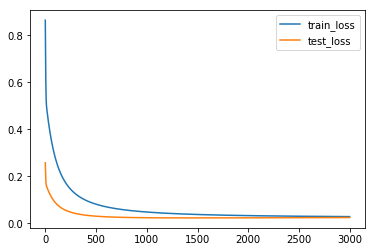

In [5]:
import seaborn as sns
def plot_learning_curve(train_loss, test_loss):
    sns.lineplot(data=train_loss, label='train_loss')
    sns.lineplot(data=test_loss, label='test_loss')
    
    
plot_learning_curve(slr.loss, slr.val_loss)

# 【問題3】指標値の算出
* 混同行列
* 確実性

In [6]:
y_pred = slr.predict(X_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

[[12  0]
 [ 0 13]]
1.0


# 【問題4】決定領域の可視化

In [7]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def decision_region(X_train, y_train, model, target_names, resolution=0.01, threshold=0.5, alpha=0.5):
    """
    ２値分類を２次元の特徴量で学習したモデルの決定領域を描く
    背景の色が学習したモデルによる推定値から描画される
    散布図の点は学習用のデータである。
    
    Parameters
    ---------------
    X_train: ndarray, shape(n_samples, 2)
        学習用データの特徴量
    y_train: ndarray, shape(n_samples,)
        学習用データの正解値
    model: object
        学習したモデルのインスタンスを入れる
    step: float, (default: 0.1)
        推定値を計算する間隔を設定する
    title: str
        グラフのタイトルの文章を与える
    xlabel, ylabel: str
        軸ラベルの文章を与える
    target_names=: list of str
        凡例の一覧を与える
    ---------------
    """
    # setting
    markers = ('*', '*')
    scatter_colors = ['red', 'blue']
    cmap = ListedColormap(('pink', 'skyblue'))
    n_class = 2

    # 2変数の入力データの最小値から最大値まで引数resolutionの幅でメッシュを描く
    X1_mesh, X2_mesh = np.meshgrid(np.arange(np.min(X_train[:, 0]) - threshold, np.max(X_train[:, 0]) + threshold, resolution), np.arange(np.min(X_train[:, 1]) - threshold, np.max(X_train[:, 1]) + threshold, resolution))

    # 予想結果を元のグリッドポイントのデータサイズに変換
    mesh = np.c_[np.ravel(X1_mesh), np.ravel(X2_mesh)]
    z = model.predict(mesh).reshape(X1_mesh.shape)
    
    # メッシュデータと分離クラスを使って決定境界を描いている
    plt.contourf(X1_mesh, X2_mesh, z, n_class-1, cmap=cmap)
    plt.xlim(X1_mesh.min(), X1_mesh.max())
    plt.ylim(X2_mesh.min(), X2_mesh.max())

    for i, target in enumerate(set(np.unique(y_train))):
        plt.scatter(X_train[y_train==target][:, 0], X_train[y_train==target][:, 1], s=80, color=scatter_colors[i], label=target_names[i], marker=markers[i])
        patches = [mpatches.Patch(color=scatter_colors[i], label=target_names[i]) for i in range(n_class)]
        plt.legend(handles=patches)
        plt.legend()
        plt.show

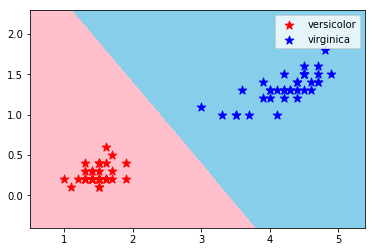

In [8]:
decision_region(X_train.values, y_train.values, slr, target_names=['versicolor', 'virginica'])

# 【問題5】（アドバンス課題）重みの保存

In [9]:
import numpy as np

# パラメータを「slr_coef.npz」として保存
np.savez('slr_coef.npz', slr.coef_)

In [10]:
# ファイルを読み込む
npzfile = np.load('slr_coef.npz')
# 保存一覧の表示
npzfile.files

['arr_0']

In [11]:
# パラメータ取得
npzfile['arr_0']

array([[-7.13466459],
       [ 2.09300626],
       [ 2.08304763]])

# 【問題6】分類と回帰

* 分類は入力データがどのクラスに分類されるかを扱う
* 入力データから数値の予測を行う